In [11]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# funciones desarrolladas
from functions.cargar_data import *
from functions.modelos import *
from functions.graficas import plot_gt

In [2]:
# carga datos diádicos
dd_deptos = cargar_dd_deptos()
dd_deptos.dtypes

cod                            int64
depto_origen                   int64
depto_destino                  int64
personas_mig                   int64
personas_mig_18_25             int64
personas_mig_26_35             int64
personas_mig_100k              int64
pob_origen                     int64
pob_destino                    int64
dist                           int64
dist_km                        int64
pbi_origen                     int64
pbi_porcen_ori               float64
pbi_destino                    int64
pbi_porcen_des               float64
pbi_origen_millardos         float64
pbi_destino_millardos        float64
largo_limite                 float64
dummy_limit                     bool
empresas_origen                int64
empresas_destino               int64
menores_25_origen              int64
menores_25_destino             int64
pob_destino_k                float64
pob_origen_k                 float64
nom_depto_orig                object
nom_depto_des                 object
e

## 1. Modelos con Montevideo

### 1.1. **Restringido en origen con variables independientes:**

- Dummy de límites

- Largo límite (km)

- PBI en destino (millardos)

- Distancia entre centros medios de población (km)

Devuelve un R-cuadrado superior a las demás combinaciones de variables independientes.

In [3]:
dd_deptos.head()

,cod,depto_origen,depto_destino,personas_mig,personas_mig_18_25,personas_mig_26_35,personas_mig_100k,pob_origen,pob_destino,dist,...,porc_ocupados_des,log_pbi_destino,log_dist_km,log_pbi_origen_millardos,log_pbi_destino_millardos,log_pob_destino_k,log_pob_origen_k,log_edad_prom_des,log_porc_ocupados_des,largo_limite_km
0,102,1,2,914,114,247,891,1318755,73377,610726,...,63.540489,16.469807,6.415097,6.143859,2.654298,4.295611,7.184443,3.525387,4.151677,1.000000e-07
1,302,3,2,74,9,22,70,520173,73377,601915,...,63.540489,16.469807,6.400257,4.457899,2.654298,4.295611,6.254161,3.525387,4.151677,1.000000e-07
2,402,4,2,15,0,6,14,84698,73377,406694,...,63.540489,16.469807,6.008813,2.836092,2.654298,4.295611,4.439092,3.525387,4.151677,1.000000e-07
3,502,5,2,28,7,8,25,123203,73377,556292,...,63.540489,16.469807,6.320768,3.779383,2.654298,4.295611,4.813833,3.525387,4.151677,1.000000e-07
4,602,6,2,32,0,10,29,57084,73377,446123,...,63.540489,16.469807,6.100319,2.566794,2.654298,4.295611,4.044524,3.525387,4.151677,1.000000e-07


In [5]:
np.log(dd_deptos.pbi_origen_millardos)

0      6.143859
1      4.457899
2      2.836092
3      3.779383
4      2.566794
         ...   
337    3.240324
338    3.293278
339    3.135233
340    2.895580
341    2.461382
Name: pbi_origen_millardos, Length: 342, dtype: float64

In [13]:
formula = """
personas_mig ~
nom_depto_orig +
log_pob_destino_k +
log_edad_prom_des + 
log_pbi_destino_millardos +
log_porc_ocupados_des + 
log_dist_km
-1
"""

# entrena y ajusta el modelo
f = sm.families.Poisson(link = log)
prodSim = smf.glm(formula=formula, data=dd_deptos, family=f).fit()

# resultados
prodSim.summary()

<ipython-input-13-e82deeb175a3>:13: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  f = sm.families.Poisson(link = log)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           personas_mig   No. Observations:                  342
Model:                            GLM   Df Residuals:                      318
Model Family:                 Poisson   Df Model:                           23
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13551.
Date:                Sun, 26 Dec 2021   Deviance:                       24875.
Time:                        15:05:00   Pearson chi2:                 2.77e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
nom_depto_orig[ARTIGAS]           13.2386      0.470     28.170      0.000      12.318      14.160
nom_depto_orig[CANELONES]         13.0442      0.468     27.894      0.000      12.128      13.961
nom_depto_orig[CERRO LARGO]       12.9048      0.470     27.446      0.000      11.983      13.826
nom_depto_orig[COLONIA]           12.6024      0.470     26.841      0.000      11.682      13.523
nom_depto_orig[DURAZNO]           12.3588      0.470     26.296      0.000      11.438      13.280
nom_depto_orig[FLORES]            11.4094      0.470     24.273      0.000      10.488      12.331
nom_depto_orig[FLORIDA]           12.1343      0.469     25.846      0.000      11.214      13.055
nom_depto_orig[LAVALLEJA]         12.1102      0.470     25.787      0.000      11.190      13.031
nom_depto_orig[MALDONADO]         12.6923      0.470     27.014      0.000      11.771      13.613
nom_depto_orig[MONTEVIDEO]        14.9960      0.469     31.942      0.000      14.076      15.916
nom_depto_orig[PAYSANDU]          12.9175      0.469     27.516      0.000      11.997      13.838
nom_depto_orig[RIO NEGRO]         12.4089      0.470     26.406      0.000      11.488      13.330
nom_depto_orig[RIVERA]            13.0778      0.470     27.821      0.000      12.156      13.999
nom_depto_orig[ROCHA]             12.4558      0.470     26.490      0.000      11.534      13.377
nom_depto_orig[SALTO]             13.1517      0.470     27.987      0.000      12.231      14.073
nom_depto_orig[SAN JOSE]          12.0249      0.469     25.625      0.000      11.105      12.945
nom_depto_orig[SORIANO]           12.6904      0.470     27.027      0.000      11.770      13.611
nom_depto_orig[TACUAREMBO]        13.0446      0.470     27.767      0.000      12.124      13.965
nom_depto_orig[TREINTA Y TRES]    12.3891      0.470     26.346      0.000      11.467      13.311
np.log(pob_destino_k)              0.4180      0.013     32.632      0.000       0.393       0.443
np.log(edad_prom_des)             -3.0930      0.124    -24.857      0.000      -3.337      -2.849
np.log(pbi_destino_millardos)      0.5221      0.013     41.322      0.000       0.497       0.547
np.log(porc_ocupados_des)          0.8514      0.093      9.113      0.000       0.668       1.035
np.log(dist_km)                   -0.6906      0.004   -167.398      0.000      -0.699      -0.682
==================================================================================================
"""

$R²$ = 0.9832

RMSE = 252.2639

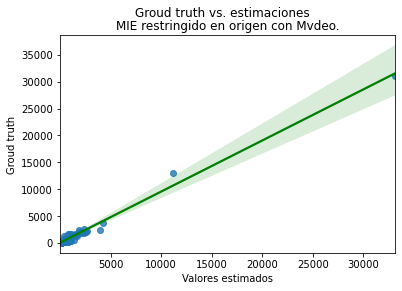

In [6]:
actual_counts = dd_deptos.personas_mig
predicted_counts = prodSim.predict()

print_scores_simple(actual_counts, predicted_counts)

title = 'Groud truth vs. estimaciones'
subtitle = 'MIE restringido en origen con Mvdeo.'

plot_gt(actual_counts, predicted_counts, title, subtitle)

In [ ]:
prodSim.save("modelos/restringido_origen_mvo.pickle")

### 1.2. **Restringido en origen pero prediciendo migrantes de 18 a 24 años**

In [ ]:
formula = """
personas_mig_18_25 ~ nom_depto_orig + dummy_limit
+ largo_limite_km + pbi_destino_millardos + dist_km + -1
"""

prodSim = smf.glm(formula=formula, data=dd_deptos, family=f).fit()

# resultados
actual_counts = dd_deptos.personas_mig_18_25
predicted_counts = prodSim.predict()

print_scores_simple(actual_counts, predicted_counts)

title = 'Groud truth vs. estimaciones'
subtitle = 'MIE restringido en origen con Mvdeo.'

plot_gt(actual_counts, predicted_counts, title, subtitle)

### 1.3. **Restringido en origen pero prediciendo migrantes de 26 a 35**

In [ ]:
formula = """
personas_mig_26_35 ~ nom_depto_orig + dummy_limit
+ largo_limite_km + pbi_destino_millardos + dist_km + -1
"""

prodSim = smf.glm(formula=formula, data=dd_deptos, family=f).fit()

# resultados
actual_counts = dd_deptos.personas_mig_26_35
predicted_counts = prodSim.predict()

print_scores_simple(actual_counts, predicted_counts)

title = 'Groud truth vs. estimaciones'
subtitle = 'MIE restringido en origen con Mvdeo.'

plot_gt(actual_counts, predicted_counts, title, subtitle)

## 2. Modelos sin Montevideo

### 2.1. **Restringido en origen con mismas var. indep. pero sin Montevideo**


In [7]:
dd_deptos_no_mvo = dd_deptos.loc[(dd_deptos.depto_origen!=1) & (dd_deptos.depto_destino!=1)]

formula = """
personas_mig ~ nom_depto_orig + dummy_limit + menores_25_destino
+ largo_limite_km + pbi_destino_millardos + dist_km -1
"""

prodSim = smf.glm(formula=formula, data=dd_deptos_no_mvo, family=f).fit()

prodSim.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           personas_mig   No. Observations:                  306
Model:                            GLM   Df Residuals:                      283
Model Family:                 Poisson   Df Model:                           22
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5201.1
Date:                Sat, 28 Aug 2021   Deviance:                       8508.3
Time:                        18:32:54   Pearson chi2:                 9.06e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
nom_depto_orig[ARTIGAS]            4.3712      0.037    119.286      0.000       4.299       4.443
nom_depto_orig[CANELONES]          4.9542      0.024    203.689      0.000       4.907       5.002
nom_depto_orig[CERRO LARGO]        4.0672      0.033    125.005      0.000       4.003       4.131
nom_depto_orig[COLONIA]            3.8274      0.030    127.495      0.000       3.769       3.886
nom_depto_orig[DURAZNO]            3.5193      0.031    113.525      0.000       3.459       3.580
nom_depto_orig[FLORES]             2.7344      0.040     69.081      0.000       2.657       2.812
nom_depto_orig[FLORIDA]            3.5636      0.030    120.156      0.000       3.505       3.622
nom_depto_orig[LAVALLEJA]          3.3095      0.033    101.736      0.000       3.246       3.373
nom_depto_orig[MALDONADO]          4.2745      0.028    152.135      0.000       4.219       4.330
nom_depto_orig[PAYSANDU]           3.9241      0.031    127.455      0.000       3.864       3.984
nom_depto_orig[RIO NEGRO]          3.5916      0.032    113.109      0.000       3.529       3.654
nom_depto_orig[RIVERA]             4.0927      0.035    117.156      0.000       4.024       4.161
nom_depto_orig[ROCHA]              3.6254      0.034    107.821      0.000       3.560       3.691
nom_depto_orig[SALTO]              4.0677      0.033    121.705      0.000       4.002       4.133
nom_depto_orig[SAN JOSE]           3.6143      0.030    119.838      0.000       3.555       3.673
nom_depto_orig[SORIANO]            3.7361      0.030    122.982      0.000       3.677       3.796
nom_depto_orig[TACUAREMBO]         3.9477      0.032    123.022      0.000       3.885       4.011
nom_depto_orig[TREINTA Y TRES]     3.7254      0.032    117.016      0.000       3.663       3.788
dummy_limit[T.True]                0.1915      0.019     10.284      0.000       0.155       0.228
menores_25_destino             -1.158e-05   2.27e-07    -50.982      0.000    -1.2e-05   -1.11e-05
largo_limite_km                    0.0075      0.000     60.603      0.000       0.007       0.008
pbi_destino_millardos              0.0573      0.001    101.023      0.000       0.056       0.058
dist_km                           -0.0016   5.95e-05    -26.722      0.000      -0.002      -0.001
==================================================================================================
"""

$R²$ = 0.8343

RMSE = 83.5727

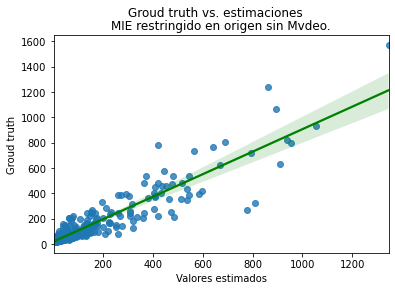

In [8]:
actual_counts = dd_deptos_no_mvo.personas_mig
predicted_counts = prodSim.predict()

print_scores_simple(actual_counts, predicted_counts)


subtitle = 'MIE restringido en origen sin Mvdeo.'
plot_gt(actual_counts, predicted_counts, title, subtitle)

In [ ]:
prodSim.save("modelos/restringido_origen_noMVO.pickle")